# Imports

In [1]:
using Flux
using Metalhead         
using HTTP, FileIO, ImageMagick
using MLUtils
using Colors
using ImageCore
using ImageTransformations: imresize
using ColorSchemes
using Images
using Statistics
using Plots
gr()
using Plots.PlotMeasures

In [28]:
include("xai.jl")

Main.xai

# Run

In [2]:
# Load model
model = VGG(16, pretrain=true).layers

Chain(
  Chain([
    Conv((3, 3), 3 => 64, relu, pad=1),  # 1_792 parameters
    Conv((3, 3), 64 => 64, relu, pad=1),  # 36_928 parameters
    MaxPool((2, 2)),
    Conv((3, 3), 64 => 128, relu, pad=1),  # 73_856 parameters
    Conv((3, 3), 128 => 128, relu, pad=1),  # 147_584 parameters
    MaxPool((2, 2)),
    Conv((3, 3), 128 => 256, relu, pad=1),  # 295_168 parameters
    Conv((3, 3), 256 => 256, relu, pad=1),  # 590_080 parameters
    Conv((3, 3), 256 => 256, relu, pad=1),  # 590_080 parameters
    MaxPool((2, 2)),
    Conv((3, 3), 256 => 512, relu, pad=1),  # 1_180_160 parameters
    Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
    Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
    MaxPool((2, 2)),
    Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
    Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
    Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
    MaxPool((2, 2)),
  ]),
  Chain(
    MLUtils.flat

In [7]:
# Strip softmax from model
model = xai.strip_softmax(xai.flatten_model(model))

Chain(
  Conv((3, 3), 3 => 64, relu, pad=1),   # 1_792 parameters
  Conv((3, 3), 64 => 64, relu, pad=1),  # 36_928 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 64 => 128, relu, pad=1),  # 73_856 parameters
  Conv((3, 3), 128 => 128, relu, pad=1),  # 147_584 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 128 => 256, relu, pad=1),  # 295_168 parameters
  Conv((3, 3), 256 => 256, relu, pad=1),  # 590_080 parameters
  Conv((3, 3), 256 => 256, relu, pad=1),  # 590_080 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 256 => 512, relu, pad=1),  # 1_180_160 parameters
  Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
  Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
  Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
  Conv((3, 3), 512 => 512, relu, pad=1),  # 2_359_808 parameters
  MaxPool((2, 2)),
  MLUtils.flatten,
  Dense(25088 => 4096, relu),           # 102_764_544 par

In [8]:
# Load input
img = load("/Users/eragon/Documents/CODE/Github/julia_deep_learning/src/castle.jpg");
input = xai.preprocess_imagenet(img);
input = reshape(input, 224, 224, 3, :);  # reshape to WHCN format

In [9]:
test_batch = cat(input, input,input, dims=4);
@info size(test_batch)

┌ Info: (224, 224, 3, 3)
└ @ Main /Users/eragon/Documents/CODE/Github/julia_deep_learning/src/builder.ipynb:2


# Gradient

In [10]:
test_grad = xai.Gradient(model, test_batch);

In [12]:
test_dim = test_grad[:,:,:,1];

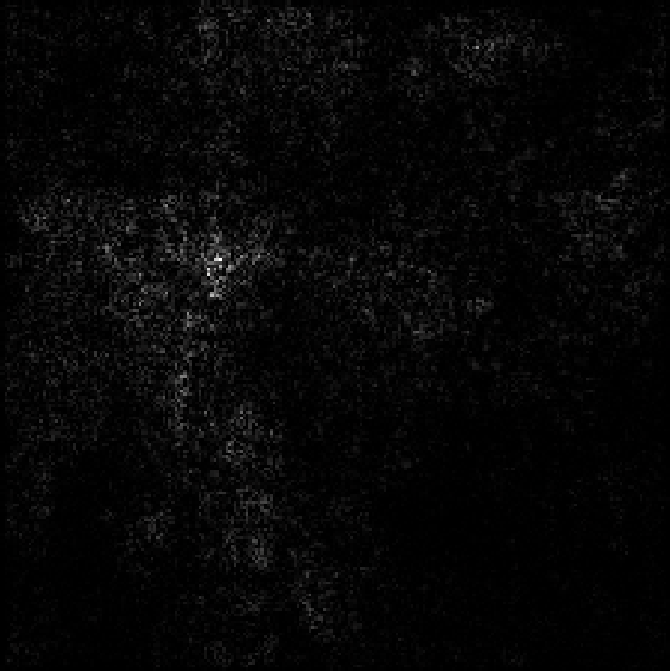

In [29]:

xai.plot_cam(test_dim[:,:,1])

# Input Times Gradient

In [30]:
test_grad = xai.InputTimesGradient(model, test_batch);

In [31]:
test_dim = test_grad[:,:,:,1];

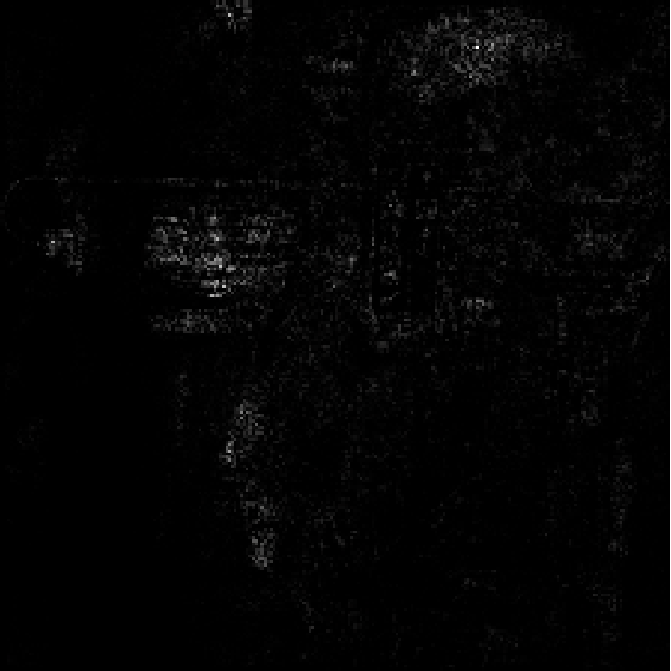

In [32]:

xai.plot_cam(test_dim[:,:,1])